# Exploratory Data Analysis about the recent history of the Olympic Games

- We will explore a dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.


# Data Set Source - Kaggle.com

# Data Dimensions:

# Data Description - 

> Contents - 

 - The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are the following:

1. ID - Unique number for each athlete;
2. Name - Athlete's name;
3. Sex - M or F;
4. Age - Integer;
5. Height - In centimeters;
6. Weight - In kilograms;
7. Team - Team name;
8. NOC - National Olympic Committee 3-letter code Country;
9. Games - Year and season;
10. Year - Integer;
11. Season - Is the Scheduled Olympic Games is Summer or Winter;
12. City - The Host city;
13. Sport - The current sport;
14. Event - Name of the Sporting Event;
15. Medal - Gold, Silver, Bronze, or NA.

# Index of content¶

1. Importing the modules.
2. Data importing.
3. Collecting information about the two datasets.
4. Joining the dataframes.
5. Distribution of the age of gold medalists.
6. Women in Athletics.
7. Medals per country.
8. Disciplines with the greatest number of Gold Medals.
9. What is the median height/weight of an Olympic medalist?
10. Evolution of the Olympics over time (Men Vs. Women).
   - 10.1 Variation of male/female athletes over time (Summer Games).
   - 10.2 Variation of age along time.
   - 10.3 Variation of weight along time.
   - 10.4 Variation of height along time.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = r"C:\Users\Administrator\Documents\Assignment 3"
os.chdir(path)
os.listdir(path)

['.ipynb_checkpoints',
 '120-years-of-olympic-history-athletes-and-results.zip',
 'athlete_events.csv',
 'noc_regions.csv',
 'Olympic Dataset - EDA.ipynb',
 'TEAM_C_Olympics_athletes and results analysis.ipynb']

In [2]:
#Importing the data

data = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')

# Collecting information about the two datasets

We are going to review the first lines of the data

Use the describe and info functions to collect stats, information, data type, column name and other info

In [3]:
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [5]:
data.info

<bound method DataFrame.info of             ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
10           6                     Per Knut Aaland   M  31.0   188.0    75.0   
11      

In [6]:
region.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [7]:
merged = pd.merge(data, region, on='NOC', how='left')

In [8]:
merged

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN


# Q10. Evolution of the Olympics over time.
- Evolution of the Olympics over time - 

We want to check that how is the olympics growing consistently:

- How the number of athletes/countries varied along time ?
- How the proportion of Men/Women varied with time ?
- How about mean age, weight and height along time ?


10.1 Variation of male/female athletes over time (Summer Games).

10.2 Variation of age along time.

10.3 Variation of weight along time.

10.4 Variation of height along time.

# 10.1 Variation of male/female athletes over time

To create two dataframes dividing the proportion of dataset using the column Sex and Season (Summer Games)

In [9]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Lets check the head of one of the new dataframes to see the result

In [10]:
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


In [11]:
WomenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN


Now, lets plot the dataframes to compare the variation over time between Men/Women

Text(0.5, 1.0, 'Variation of Male Athletes over time')

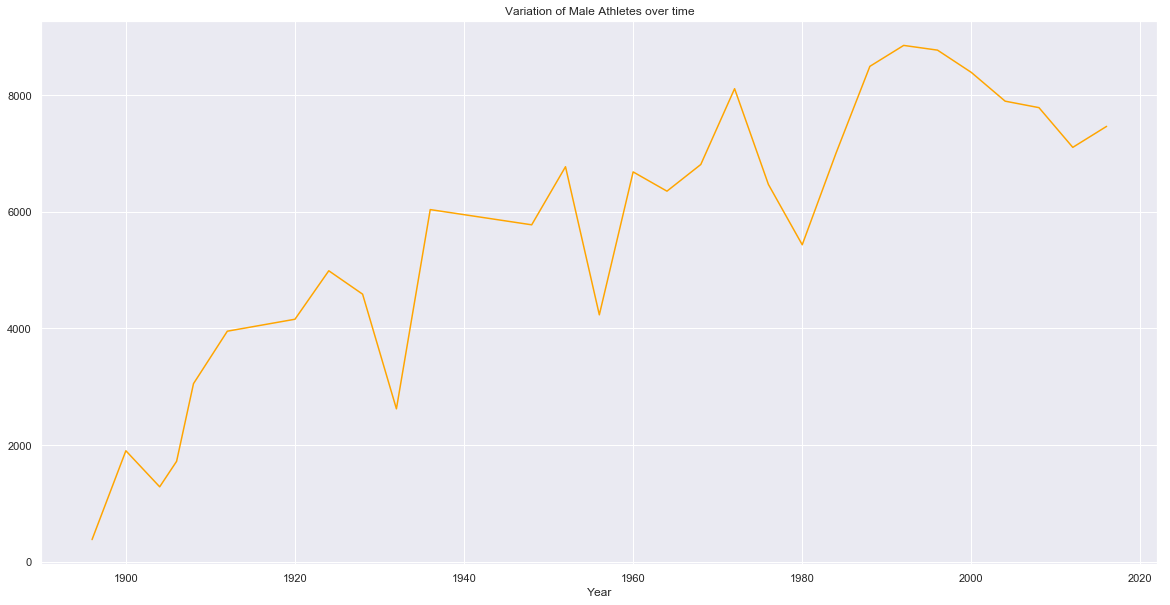

In [70]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot(color='orange')
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

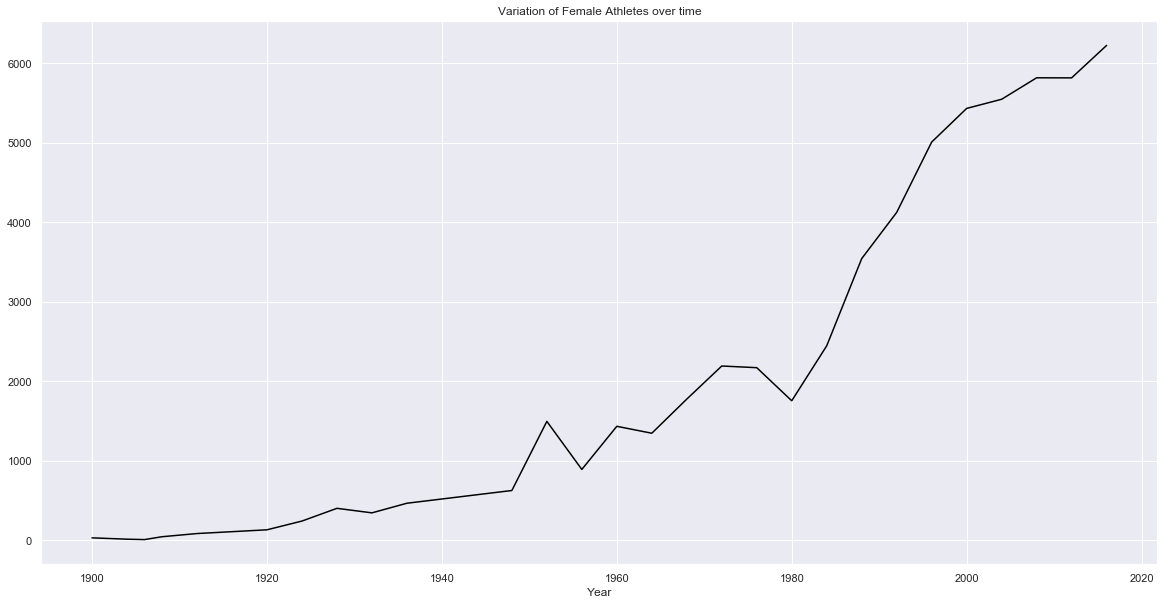

In [72]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot(color='black')
plt.title('Variation of Female Athletes over time')

Ultimately, we can combine them

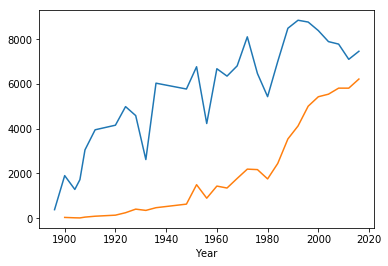

In [12]:
MenOverTime.groupby('Year').size().plot(kind='line')
WomenOverTime.groupby('Year').size().plot(kind='line')

What I immediately saw for women:

We have a steep increase in the population;
The growth is constant.

On the other hand, the growth for men seems less strong:

After the 1990 we can see a relevant decrease in the number of male athletes at the summer games;
The growth has slowly restarted recently.

# 10.2 Variation of age along time

1) How the age of athletes have been changing over time

Creating a boxplot of variation of age of Male Athletes over time

Text(0.5, 1.0, 'Variation of Age for Male Athletes over time')

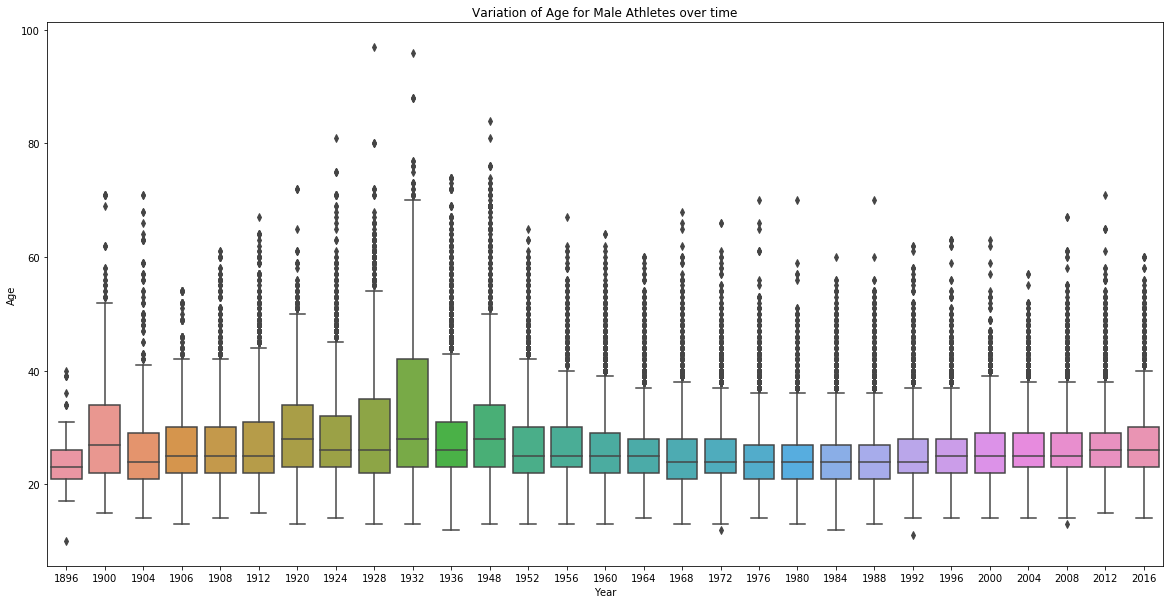

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenOverTime)
plt.title('Variation of Age for Male Athletes over time')

2) How the age of females are changing over time

Creating a boxplot of variation of age of Female Athletes over time

Text(0.5, 1.0, 'Variation of Age for Female Athletes over time')

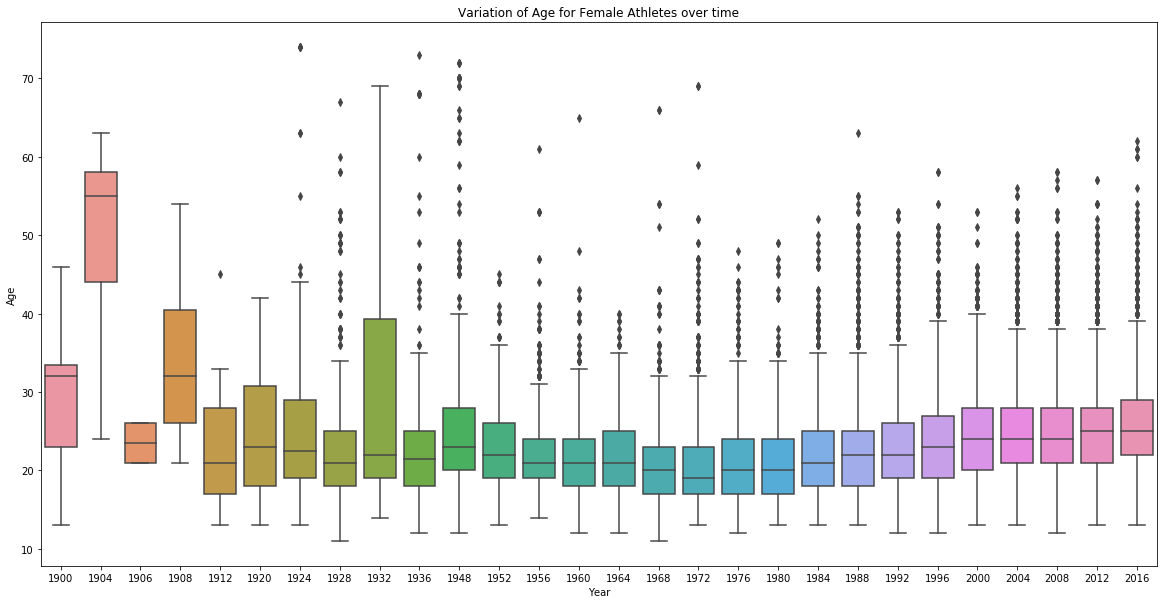

In [14]:
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=WomenOverTime)
plt.title('Variation of Age for Female Athletes over time')

Interesting points for me:

Generally, the age distribution starts has a lower minimum and a lower maximum;

In 1904 the age distribution is strongly different from the other Olympics. Let's know and analyse more about this point

In [27]:
WomenOverTime.loc[WomenOverTime['Year'] == 1904]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44365,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Silver,USA,NaN
44366,22877,Emma C. Cooke,F,55.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Silver,USA,NaN
99506,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Gold,USA,NaN
99507,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Gold,USA,NaN
99508,50366,"Matilda ""Lida"" Howell (Scott-)",F,44.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
190950,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,Bronze,USA,NaN
190951,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,Bronze,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
237131,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double Columbia Round,NaN,USA,NaN
237132,118921,"Leonora Josephine ""Leonie"" Taylor",F,NaN,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Double National Round,NaN,USA,NaN


# 10.3 Variation of weight along time

We will now try using a pointplot to visualize the variation in weight over athletes. This is actually

First we will try to show the first graph which will show data for men, the second for women:

Text(0.5, 1.0, 'Variation of Weight for Male Athletes over time')

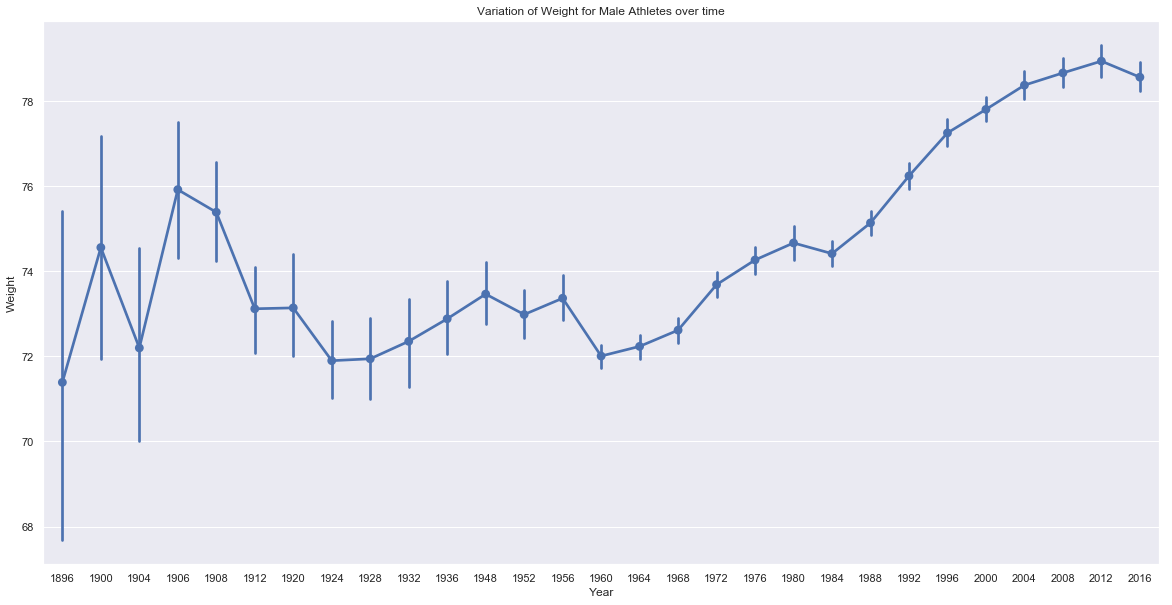

In [28]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=MenOverTime)
plt.title('Variation of Weight for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Weight for Female Athletes over time')

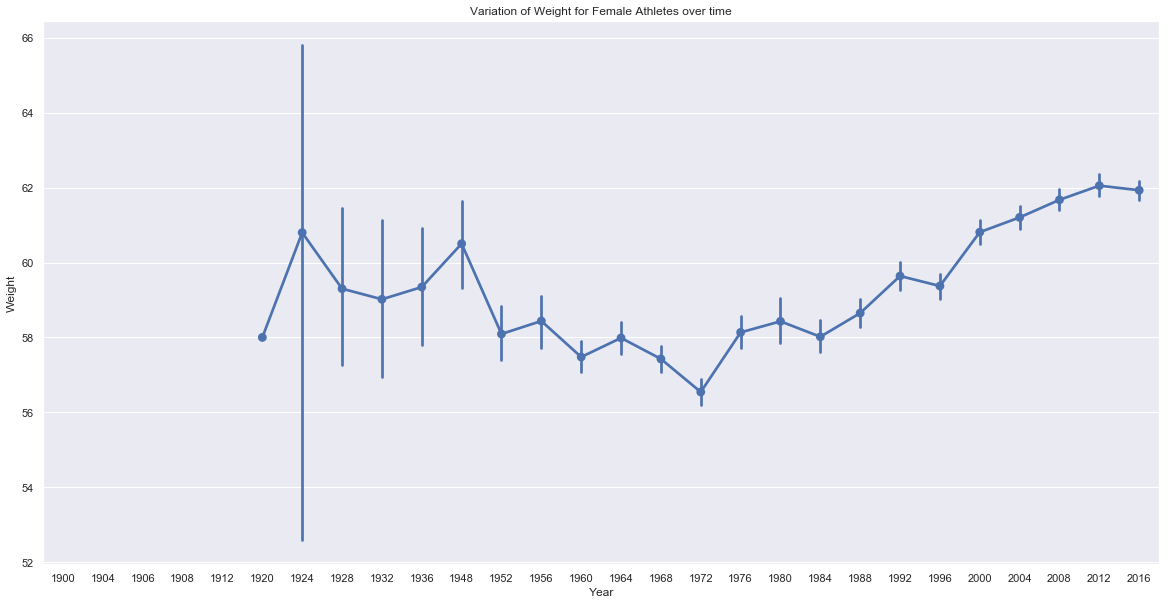

In [29]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Weight', data=WomenOverTime)
plt.title('Variation of Weight for Female Athletes over time')

As after analysis, we can see that umm, it seems that we dont have much data on Women before 1924 Olympic games

Now, lets try out filtering all the women athletes for that period to review the point:

In [29]:
WomenInOlympics.loc[WomenInOlympics['Year'] < 1924].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
1738,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 100 metres Freestyle,NaN,Austria,NaN
1739,968,"Margarete ""Grete"" Adler",F,16.0,NaN,NaN,Austria,AUT,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze,Austria,NaN
1756,975,Anna Mrtha Vilhelmina Adlerstrhle (von Oelreich-),F,39.0,NaN,NaN,Sweden,SWE,1908 Summer,1908,Summer,London,Tennis,"Tennis Women's Singles, Covered Courts",Bronze,Sweden,NaN
1768,978,Mrta Elvira Adlerz (-Hermansson),F,15.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Diving,Diving Women's Plain High,NaN,Sweden,NaN
1769,978,Mrta Elvira Adlerz (-Hermansson),F,23.0,NaN,NaN,Sweden,SWE,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Plain High,NaN,Sweden,NaN
2749,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain-1,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Mixed Doubles, Covered Courts",Silver,UK,NaN
2750,1531,Frances Helen Aitchison (-Leisk),F,30.0,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Tennis,"Tennis Women's Singles, Covered Courts",NaN,UK,NaN
4963,2830,Mary Aileen Allen (Conquest-),F,31.0,157.0,NaN,United States,USA,1920 Summer,1920,Summer,Antwerpen,Diving,Diving Women's Springboard,NaN,USA,NaN


Okay, so the first values seems all NaN (Not a number) so the information is correct.

# 10.4 Variation of height along time
Let's use the same point plotting technique (with a different palette) so that we can plot the weight change along time.

The first graph will show the information for men and the second for women:

Text(0.5, 1.0, 'Variation of Height for Male Athletes over time')

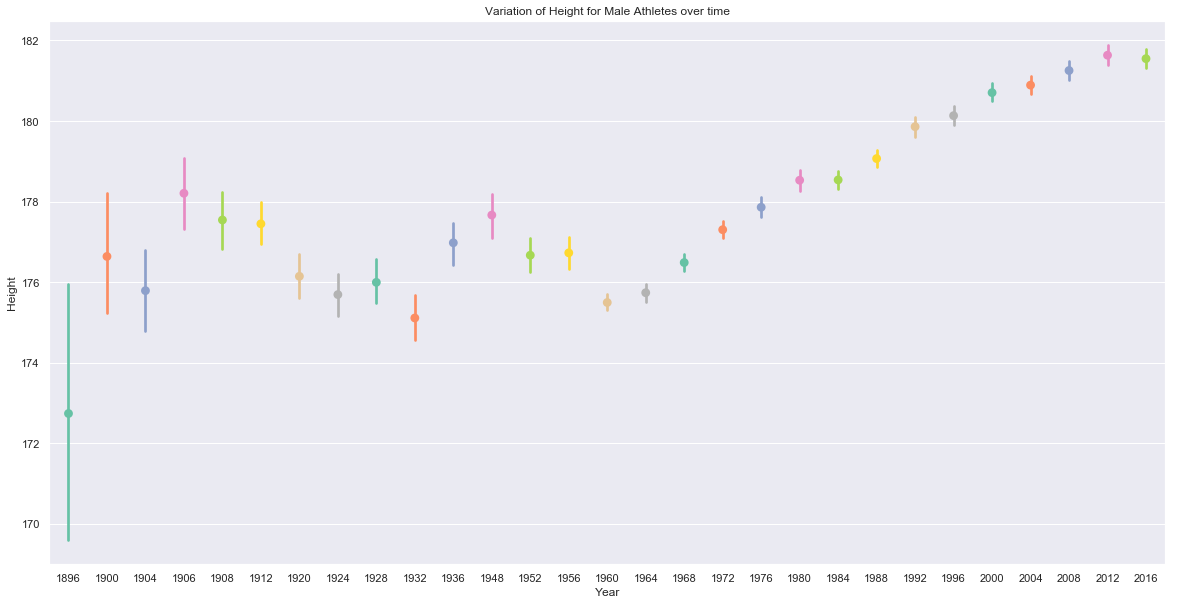

In [30]:
plt.figure(figsize=(20, 10))
sns.pointplot('Year', 'Height', data=MenOverTime, palette='Set2')
plt.title('Variation of Height for Male Athletes over time')

Text(0.5, 1.0, 'Variation of Height for Female Athletes Over Time')

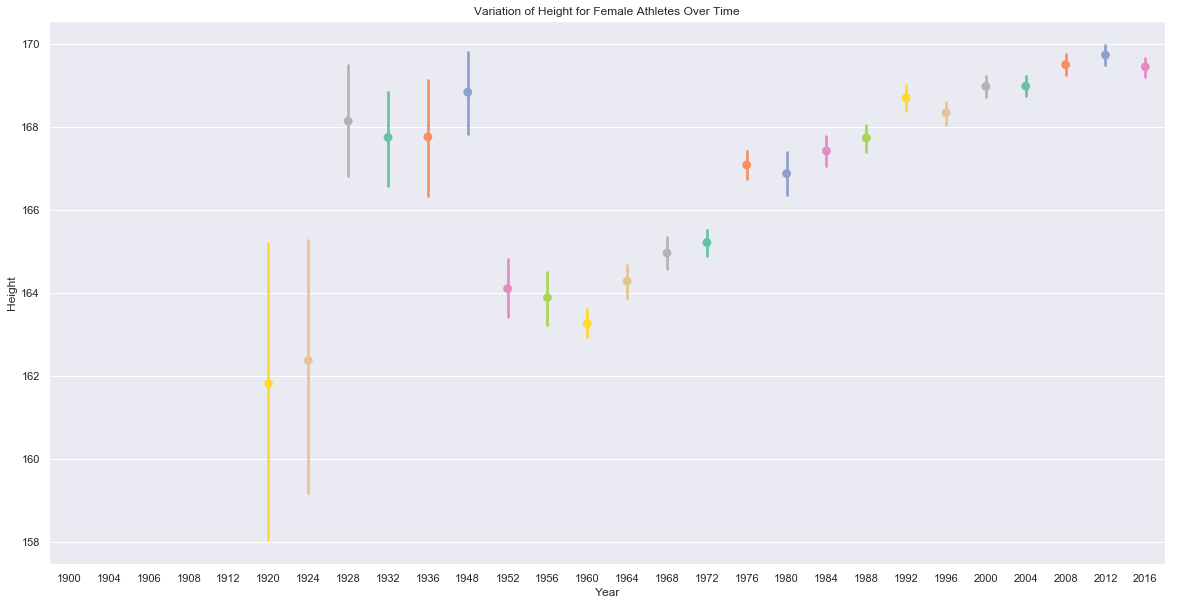

In [31]:
plt.figure(figsize=(20,10))
sns.pointplot('Year','Height', data=WomenOverTime, palette='Set2')
plt.title('Variation of Height for Female Athletes Over Time')

What we may see that:

1. For both men and women, the height is incrementing over time but it is decreasing between the 2012 and the 2016.
2. For women we have a peak between 1928 and 1948, let's deepen this point:

In [32]:
WomenOverTime.loc[(WomenOverTime['Year']>1924) & (WomenOverTime['Year']<1952)].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
731,419,Majken berg,F,30.0,170.0,60.0,Sweden,SWE,1948 Summer,1948,Summer,London,Athletics,Athletics Women's Discus Throw,NaN,Sweden,NaN
1301,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Freestyle,NaN,Hungary,NaN
1302,733,Ilona cs (-Zimmermann),F,16.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,NaN,Hungary,NaN
1484,825,Lynda Riley Adams (-Hunt),F,16.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Springboard,NaN,Canada,NaN
1485,825,Lynda Riley Adams (-Hunt),F,16.0,NaN,NaN,Canada,CAN,1936 Summer,1936,Summer,Berlin,Diving,Diving Women's Platform,NaN,Canada,NaN
1525,845,"Birgitta Ann-Agnes ""Bride"" Adams-Ray",F,21.0,NaN,NaN,Sweden,SWE,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Women's High Jump,NaN,Sweden,NaN
1567,874,"Edith Addams de Habbelinck (-Lutjens, -Taylor,...",F,20.0,NaN,NaN,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN
1568,875,Jenny Marie Beatrice Addams,F,19.0,NaN,NaN,Belgium,BEL,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Women's Foil, Individual",NaN,Belgium,NaN


The list is full of NaN values, that is why the data from the period deviates from what's expected

# Q1. Distribution of the age of gold medalists

Let's create a new dataframe including only gold medalist from 1896 to 2016

In [15]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


I would like to have a plot of the Age to see the distribution but I need to check first if the Age column contains NaN values

In [16]:
goldMedals.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
region     True
notes      True
dtype: bool

Let's take only the values that are different from NaN.

In [17]:
goldMedals = goldMedals[np.isfinite(goldMedals['Age'])]

In [18]:
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


We will check using a count plot to see the result.

Text(0.5, 1.0, 'Distribution of Gold Medals')

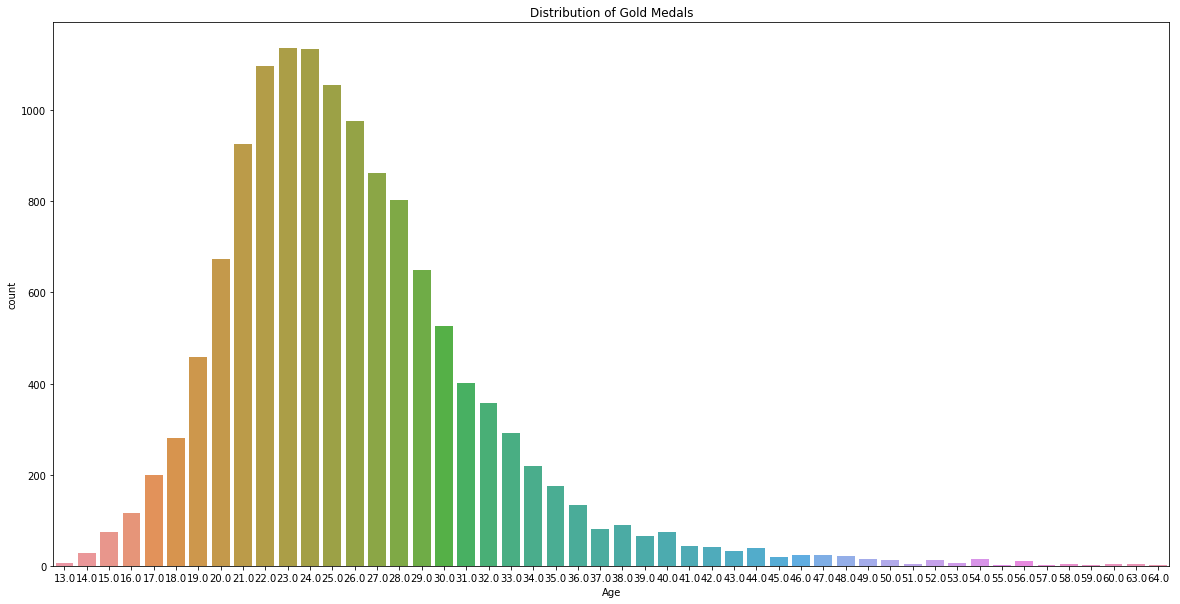

In [19]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

- It seems that we have people with Age greater that 50 with a gold medal. Let's find out the plot for them.

In [20]:
goldMedals['ID'][goldMedals['Age'] > 50].count()

65

65 people: Wow, awesome! But which disciplines allows you to land a gold medal after your fifties?

We will now create a new dataframe called masterDisciplines in which we will insert this new set of people and then create a visualization with it

In [21]:
masterDiscipline = goldMedals['Sport'][goldMedals['Age'] > 50]

Text(0.5, 1.0, 'Gold Medals for Athletes Over 50')

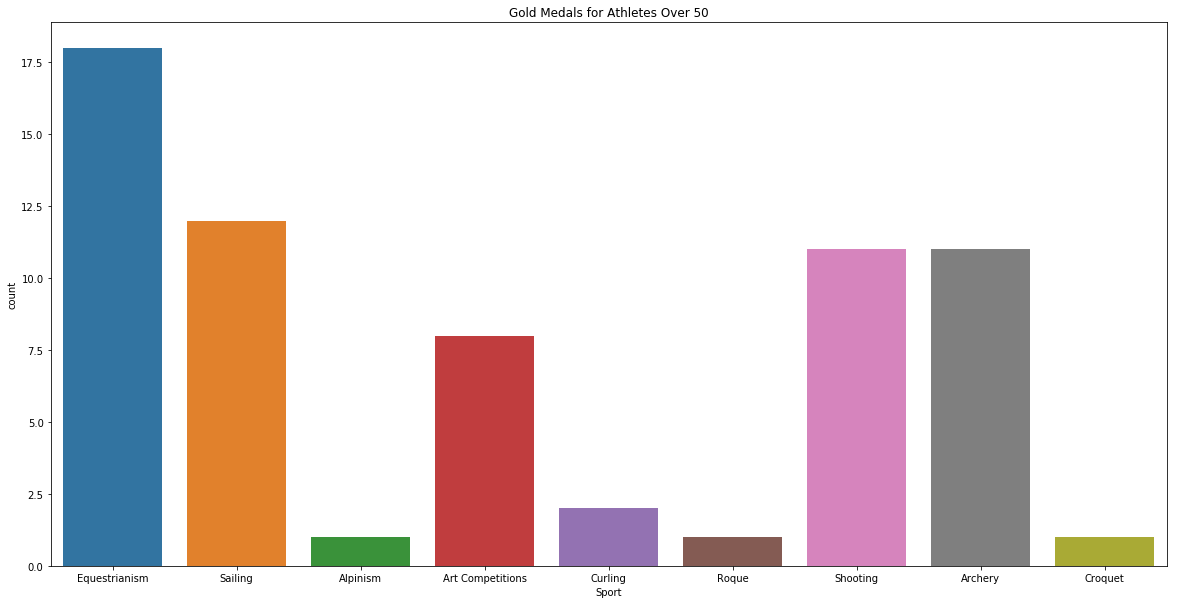

In [22]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(masterDiscipline)
plt.title('Gold Medals for Athletes Over 50')

Seems that our senior gold medalists are shooters, archers, sailors and, above all, horse riders. Hmmm, very much activity

# Q2. Women In Athletics

- Now, we will try to understand how much medals we have only for women in the recent history of the Summer Games.
- Let's create a filtered dataset: 

In [23]:
WomenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [24]:
WomenInOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NaN,Finland,NaN
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,Norway,NaN
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,Netherlands,NaN
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,Norway,NaN
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN
136,49,Moonika Aava,F,28.0,168.0,65.0,Estonia,EST,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,NaN,Estonia,NaN


 - To plot the curve over time, let's create a plot in which we put the year (on the x-axis) and count of the number of medals per edition of the games (consider that we will have more medals for the same athlete).

Text(0.5, 1.0, 'Women medals per edition of the Games')

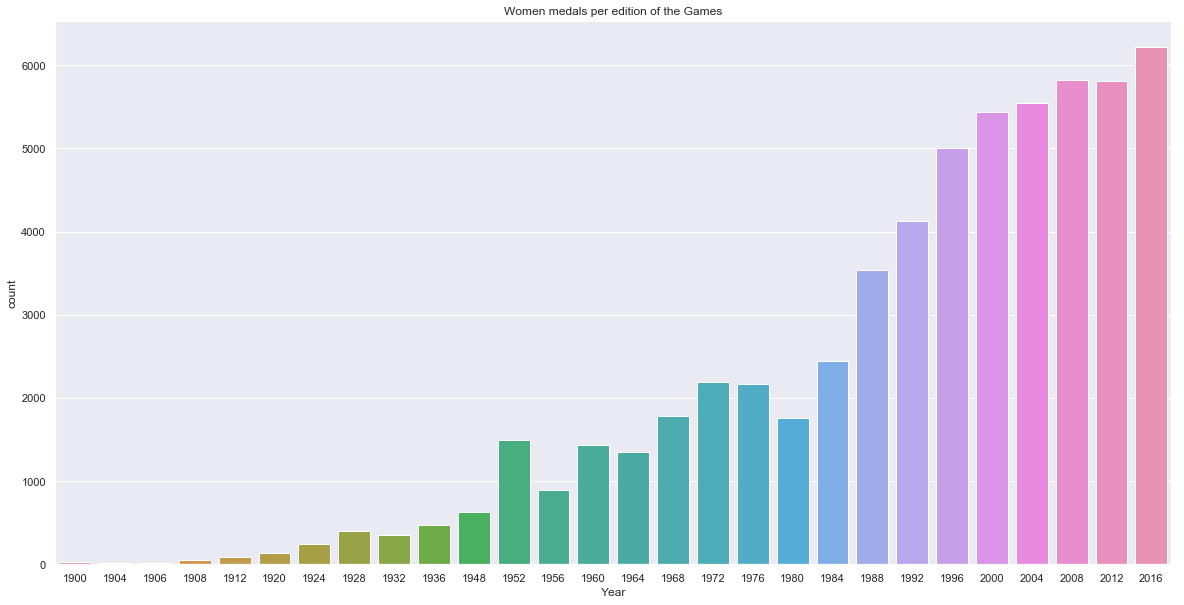

In [25]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=WomenInOlympics)
plt.title('Women medals per edition of the Games')

Now, believe me or not, i would like to Cross check my dataset. I want to try to review only the medalists from the 1900 Summer Olympics to see if my visualization is correct or not.

In [33]:
WomenInOlympics.loc[WomenInOlympics['Year'] == 1900].head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN


Okay, let's count the rows (same code as above adding the count() function and filtering only for ID).

In [34]:
WomenInOlympics['ID'].loc[WomenInOlympics['Year']==1900].count()

33

Yeah, from the looks of the data, we have 33 records (with repetitions, for example 'Marion Jones (-Farquhar)' won a medal both for Tennis Women's Singles and Tennis Mixed Doubles - To be sure I cross-checked also with Wikipedia and the outcome seems correct).

# Q3. Medals per country

 - Let's review the Top 5 Gold Medal Countries

In [35]:
goldMedals.region

3             Denmark
42            Finland
44            Finland
48            Finland
60             Norway
73             Norway
76             Norway
78             Norway
79             Norway
113            Norway
117            Norway
150            France
172           Belarus
173            France
174            France
178          Cameroon
182             Spain
188             Spain
200            France
218             Italy
219             Italy
220             Italy
221             Italy
222             Italy
226             Italy
227             Italy
283               USA
524          Pakistan
550            Russia
587        Uzbekistan
             ...     
270411          Italy
270416          Italy
270431          China
270432          China
270433          China
270434          China
270435          China
270439          China
270440          China
270477         Serbia
270480         Russia
270514        Croatia
270552        Hungary
270588         Russia
270609    

In [36]:
#goldmedals per region 
#goldMedals.region.value_counts()
goldMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Now let's plot it:

In [37]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(10)
totalGoldMedals

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Medals per Country')

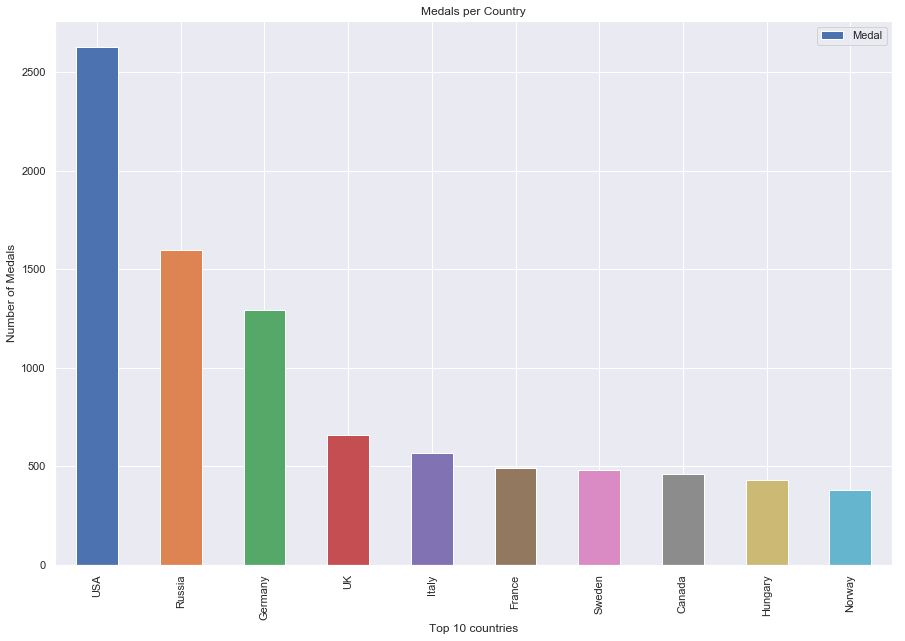

In [46]:
totalGoldMedals.plot(kind='bar',x='index',y='Medal')
plt.rcParams['figure.figsize'] = [15, 10]
plt.xlabel("Top 10 countries")
plt.ylabel("Number of Medals")
plt.title('Medals per Country')

The USA seems to be the most winning country, having more Gold.

But which are the most awarded disciplines of American Athletes? Let's find out

# Q4. Disciplines with the greatest number of gold medals

Let's create a dataframe to filter the gold medals only for the USA

In [47]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC']=='USA']

We need to count medals per game/discipline

In [48]:
goldMedalsUSA.Event.value_counts()

Basketball Men's Basketball                                    186
Swimming Men's 4 x 200 metres Freestyle Relay                  111
Swimming Men's 4 x 100 metres Medley Relay                     108
Rowing Men's Coxed Eights                                      107
Basketball Women's Basketball                                   95
Athletics Men's 4 x 400 metres Relay                            81
Swimming Women's 4 x 100 metres Medley Relay                    79
Swimming Women's 4 x 100 metres Freestyle Relay                 78
Football Women's Football                                       66
Athletics Men's 4 x 100 metres Relay                            63
Swimming Men's 4 x 100 metres Freestyle Relay                   58
Athletics Women's 4 x 100 metres Relay                          50
Softball Women's Softball                                       45
Athletics Women's 4 x 400 metres Relay                          38
Rugby Men's Rugby                                             

In [50]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(25)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


As we can see that, Basketball is the leading discipline!, Wow what the actual awesomeness oh yeah i like it, oh yeah

- Now, from my viewpoint, we are reviewing a list of athletes, but maybe we are counting the medal of each member of the team instead of 'counting the medals per team'.

- Let's slice the dataframe using only the data of 'male' athletes to better review it:

In [51]:
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Sex'] == 'M')]

In [54]:
basketballGoldUSA.sort_values(['Year']).head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
109529,55375,Francis Lee Johnson,M,25.0,180.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
143383,71965,Frank John Lubin,M,26.0,200.0,113.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
161770,81220,"Arthur Owen ""Art"" Mollner",M,23.0,183.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
79052,40143,"John Haskell ""Tex"" Gibbons",M,28.0,185.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
189347,95095,"Donald Arthur ""Don"" Piper",M,25.0,180.0,73.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
71407,36368,"Joseph Cephis ""Joe"" Fortenberry",M,25.0,203.0,84.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
195790,98309,Jack Williamson Ragland,M,22.0,183.0,79.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
213368,107150,Willard Theodore Schmidt,M,26.0,205.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
219204,110112,Carl Leslie Shy,M,27.0,183.0,77.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
22390,11790,Ralph English Bishop,M,20.0,193.0,86.0,United States,USA,1936 Summer,1936,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN


- What we supposed is true: the medals are not grouped by Edition/Team but we were counting the gold medals of each member of the team!

Let's proceed grouping by year the athletes - the idea is to create a new dataframe to make a pre-filter using only the first record for each member of the team.

In [56]:
groupedBasketUSA=basketballGoldUSA.groupby(['Year']).first()
groupedBasketUSA

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,region,notes
Year,,,,,,,,,,,,,,,,
1936,7396,"Samuel J. ""Sam"" Balter, Jr.",M,26.0,178.0,68.0,United States,USA,1936 Summer,Summer,Berlin,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1948,7881,"Clifford Eugene ""Cliff"" Barker",M,27.0,188.0,84.0,United States,USA,1948 Summer,Summer,London,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1952,13302,"Ronald Yngve ""Ron"" Bontemps",M,25.0,188.0,79.0,United States,USA,1952 Summer,Summer,Helsinki,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1956,14153,"Richard James ""Dick"" Boushka",M,22.0,195.0,95.0,United States,USA,1956 Summer,Summer,Melbourne,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1960,5212,Jay Joseph Hoyland Arnette,M,21.0,188.0,79.0,United States,USA,1960 Summer,Summer,Roma,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1964,7958,"Velvet James ""Jim"" Barnes",M,23.0,201.0,109.0,United States,USA,1964 Summer,Summer,Tokyo,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1968,8104,"Michael Thomas ""Mike"" Barrett",M,25.0,188.0,73.0,United States,USA,1968 Summer,Summer,Mexico City,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1976,5173,"Michel Taylor ""Tate"" Armstrong",M,20.0,190.0,77.0,United States,USA,1976 Summer,Summer,Montreal,Basketball,Basketball Men's Basketball,Gold,USA,NaN
1984,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold,USA,NaN


Lets count the records obtained:

In [57]:
groupedBasketUSA['ID'].count()

15

We have 15 records. It seems that the filtering option has gave us the desired result

# Q5. What is the median height/weight of an Olympic medalist?

Let's try to plot a scatterplot of height vs weight to see the distribution of values (without grouping by discipline).

First of all, we have to take again the goldMedals dataframe again

In [58]:
goldMedals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


We can see that we have NaN values both in height and weight columns.

At this point, we can act as follows:

1. Using only the rows that has a value in the Height and Weight columns;
2. Replace the value with the mean of the column.

Solution 2 in my opinion it is not the best way to go: we are talking about data of athletes of different ages and different disciplines (that have done different training). So, Let's go with solution 1.

The first thing to do is to collect general information about the dataframe that we have to use: goldMedals.

In [59]:
goldMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13224 entries, 3 to 271076
Data columns (total 17 columns):
ID        13224 non-null int64
Name      13224 non-null object
Sex       13224 non-null object
Age       13224 non-null float64
Height    10532 non-null float64
Weight    10248 non-null float64
Team      13224 non-null object
NOC       13224 non-null object
Games     13224 non-null object
Year      13224 non-null int64
Season    13224 non-null object
City      13224 non-null object
Sport     13224 non-null object
Event     13224 non-null object
Medal     13224 non-null object
region    13223 non-null object
notes     171 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.4+ MB


Okay, we have more than 13,000 rows.

We will now create a dataframe filtering only the rows that has the column Height and Weight populated.

In [60]:
notNullMedals = goldMedals[(goldMedals['Height'].notnull()) & (goldMedals['Weight'].notnull())]

Okay, let's see the first rows of the dataset and the new information with the info function.

In [61]:
notNullMedals.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.0,Norway,NOR,2002 Winter,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold,Norway,NaN
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.0,Norway,NOR,2006 Winter,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
172,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,Belarus,NaN
173,73,Luc Abalo,M,23.0,182.0,86.0,France,FRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Men's Handball,Gold,France,NaN
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold,France,NaN


In [62]:
notNullMedals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10167 entries, 42 to 271076
Data columns (total 17 columns):
ID        10167 non-null int64
Name      10167 non-null object
Sex       10167 non-null object
Age       10167 non-null float64
Height    10167 non-null float64
Weight    10167 non-null float64
Team      10167 non-null object
NOC       10167 non-null object
Games     10167 non-null object
Year      10167 non-null int64
Season    10167 non-null object
City      10167 non-null object
Sport     10167 non-null object
Event     10167 non-null object
Medal     10167 non-null object
region    10166 non-null object
notes     143 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.4+ MB


Okay, we have 10000 rows. So let's create a scatterplot to show the varied points

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


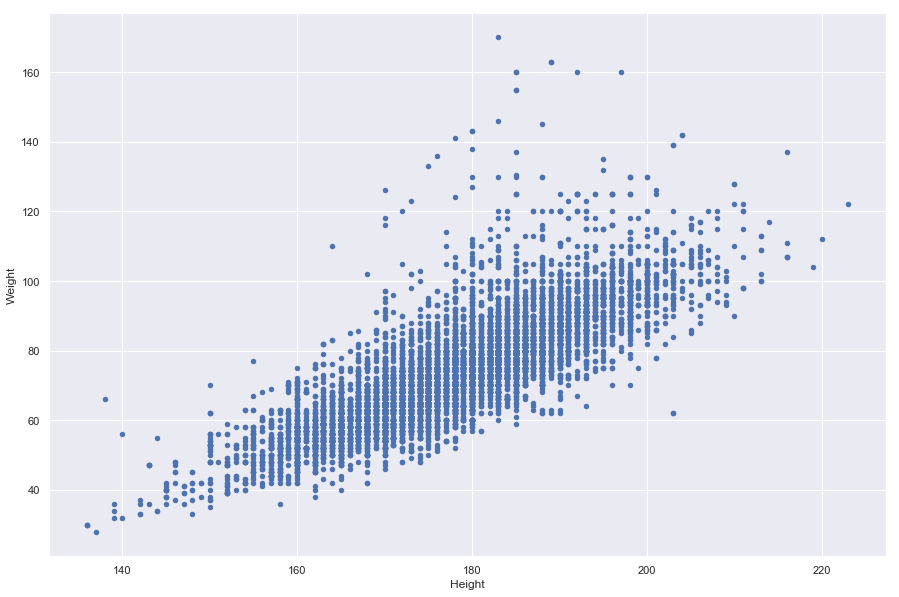

In [63]:
notNullMedals.plot(kind='scatter',x='Height',y='Weight')

Text(0.5, 1.0, 'Height vs Weight of Olympic Medalists')

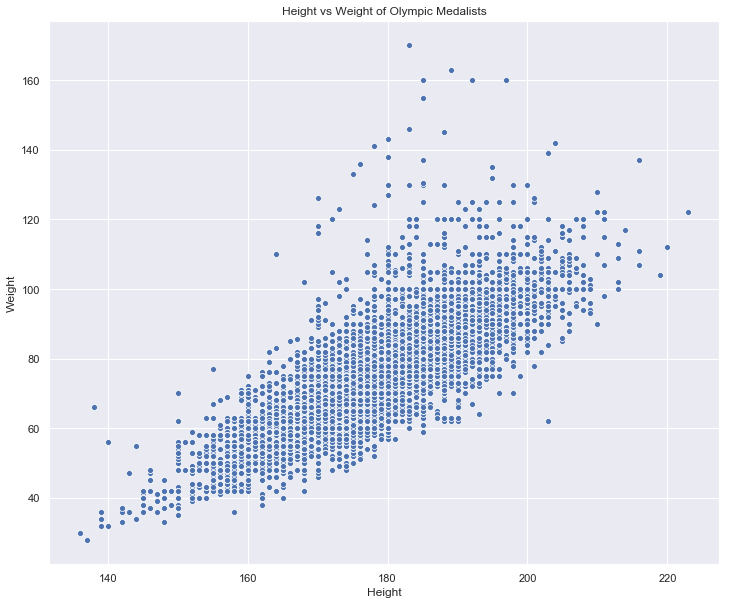

In [64]:
plt.figure(figsize=(12, 10))
ax = sns.scatterplot(x="Height", y="Weight", data=notNullMedals)
plt.title('Height vs Weight of Olympic Medalists')

- The vast majority of the samples show a linear relation between height and weight (the more the weight, the more the height).

- We have exceptions and I am willing to know more!

For example, let's see which is the athlete that weighs more than 160 kilograms

In [65]:
notNullMedals.loc[notNullMedals['Weight'] > 160]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
39181,20144,Andrey Ivanovich Chemerkin,M,24.0,183.0,170.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Weightlifting,Weightlifting Men's Super-Heavyweight,Gold,Russia,NaN
268659,134407,Leonid Ivanovych Zhabotynskiy,M,26.0,189.0,163.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN
268660,134407,Leonid Ivanovych Zhabotynskiy,M,30.0,189.0,163.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Weightlifting,Weightlifting Men's Heavyweight,Gold,Russia,NaN


# ---------------------------------------------Document End---------------------------------------------#